In [51]:
import pandas as pd
import networkx as nx
import random

#SETTINGS INIZIALE DATAFRAME
df = pd.read_csv('reddit_comments.csv') #con ../ metti direttamente il file
df['parent_id'] = df['parent_id'].str.slice(3) # Eliminazione dei primi tre caratteri dalla colonna 'Colonna'

nodes = pd.read_csv('nodes.csv', index_col=False)
edges = pd.read_csv('edges.csv', index_col=False)


author = 'author' #id
parent_author = 'parent_author' #id padre del commento

print("Totale nodi = ",len(nodes))
print("Torale righe/archi = ",len(edges))

df.head(3)

Totale nodi =  49885
Torale righe/archi =  49885


,date,clean_text,parent_id,id,author,created_utc,num_comments,score,type,parent_author
0,26/12/2022,well yes its putting out more and more pc wish...,mf78,j1rg7ow,-----fuck-----,1672086947,NaN,1,comment,omgpop
1,28/12/2022,gifgiphy,x2u1,j1xj2cx,---LefeverDream---,1672197350,NaN,1,comment,SpaceNigiri
2,26/12/2022,milli vanilli,sww6,j1oak8n,---nom---,1672018544,NaN,1,comment,MsolProd


In [52]:
G = nx.DiGraph()
G = nx.from_pandas_edgelist(edges, source = 'author', target = 'parent_author', create_using = nx.DiGraph())
G.add_nodes_from(nodes)

#G.remove_edges_from(nx.selfloop_edges(G)) #Eliminazione dei self loop

print(G)

DiGraph with 13171 nodes and 40948 edges


In [53]:
G = nx.DiGraph()
G = nx.from_pandas_edgelist(edges, source = 'author', target = 'parent_author', create_using = nx.DiGraph())
G.add_nodes_from(nodes)

#G.remove_edges_from(nx.selfloop_edges(G)) #Eliminazione dei self loop

print(G)

DiGraph with 13171 nodes and 40948 edges


## SI

In [54]:
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep

In [55]:
model = ep.SIModel(G)

In [56]:
model.available_statuses

{'Susceptible': 0, 'Infected': 1}

In [57]:
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.001) # infection rate
cfg.add_model_parameter("percentage_infected", 0.01)
model.set_initial_status(cfg)

In [58]:
iterations = model.iteration_bunch(100, node_status=True)
trends = model.build_trends(iterations)

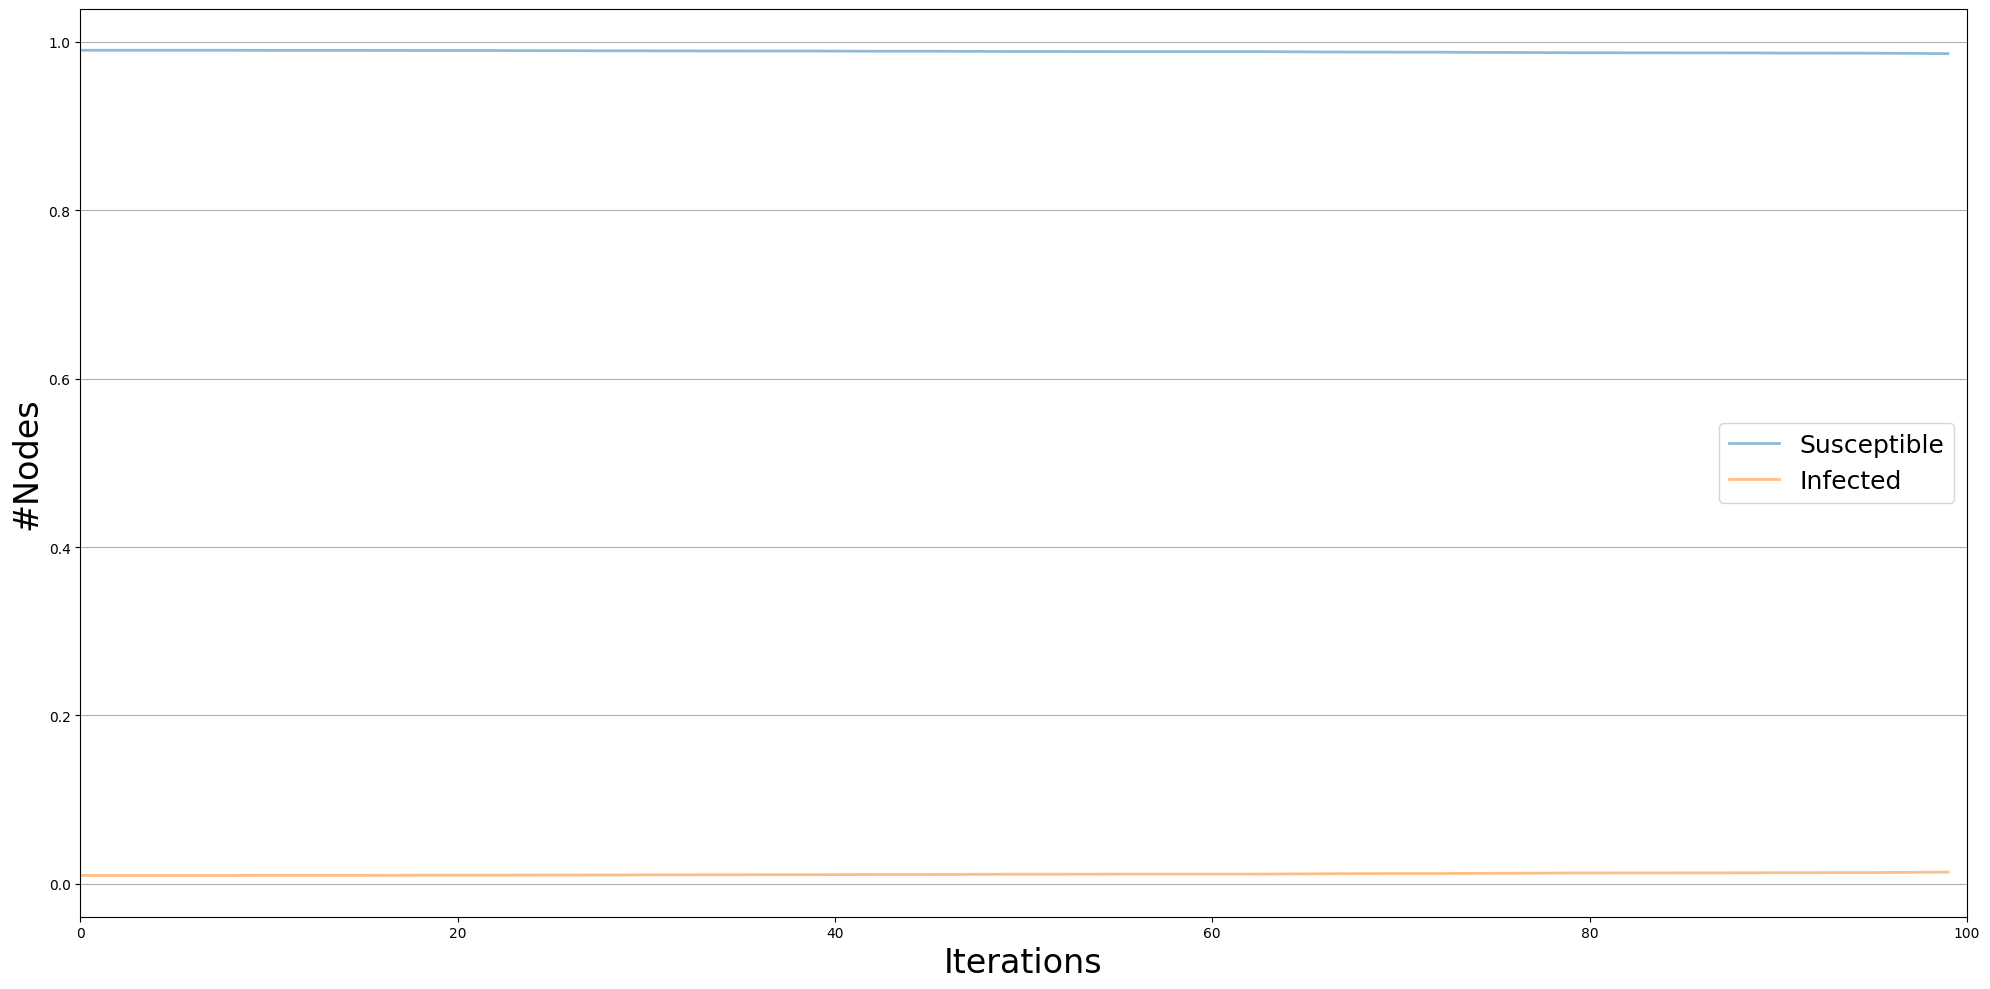

In [59]:
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot()

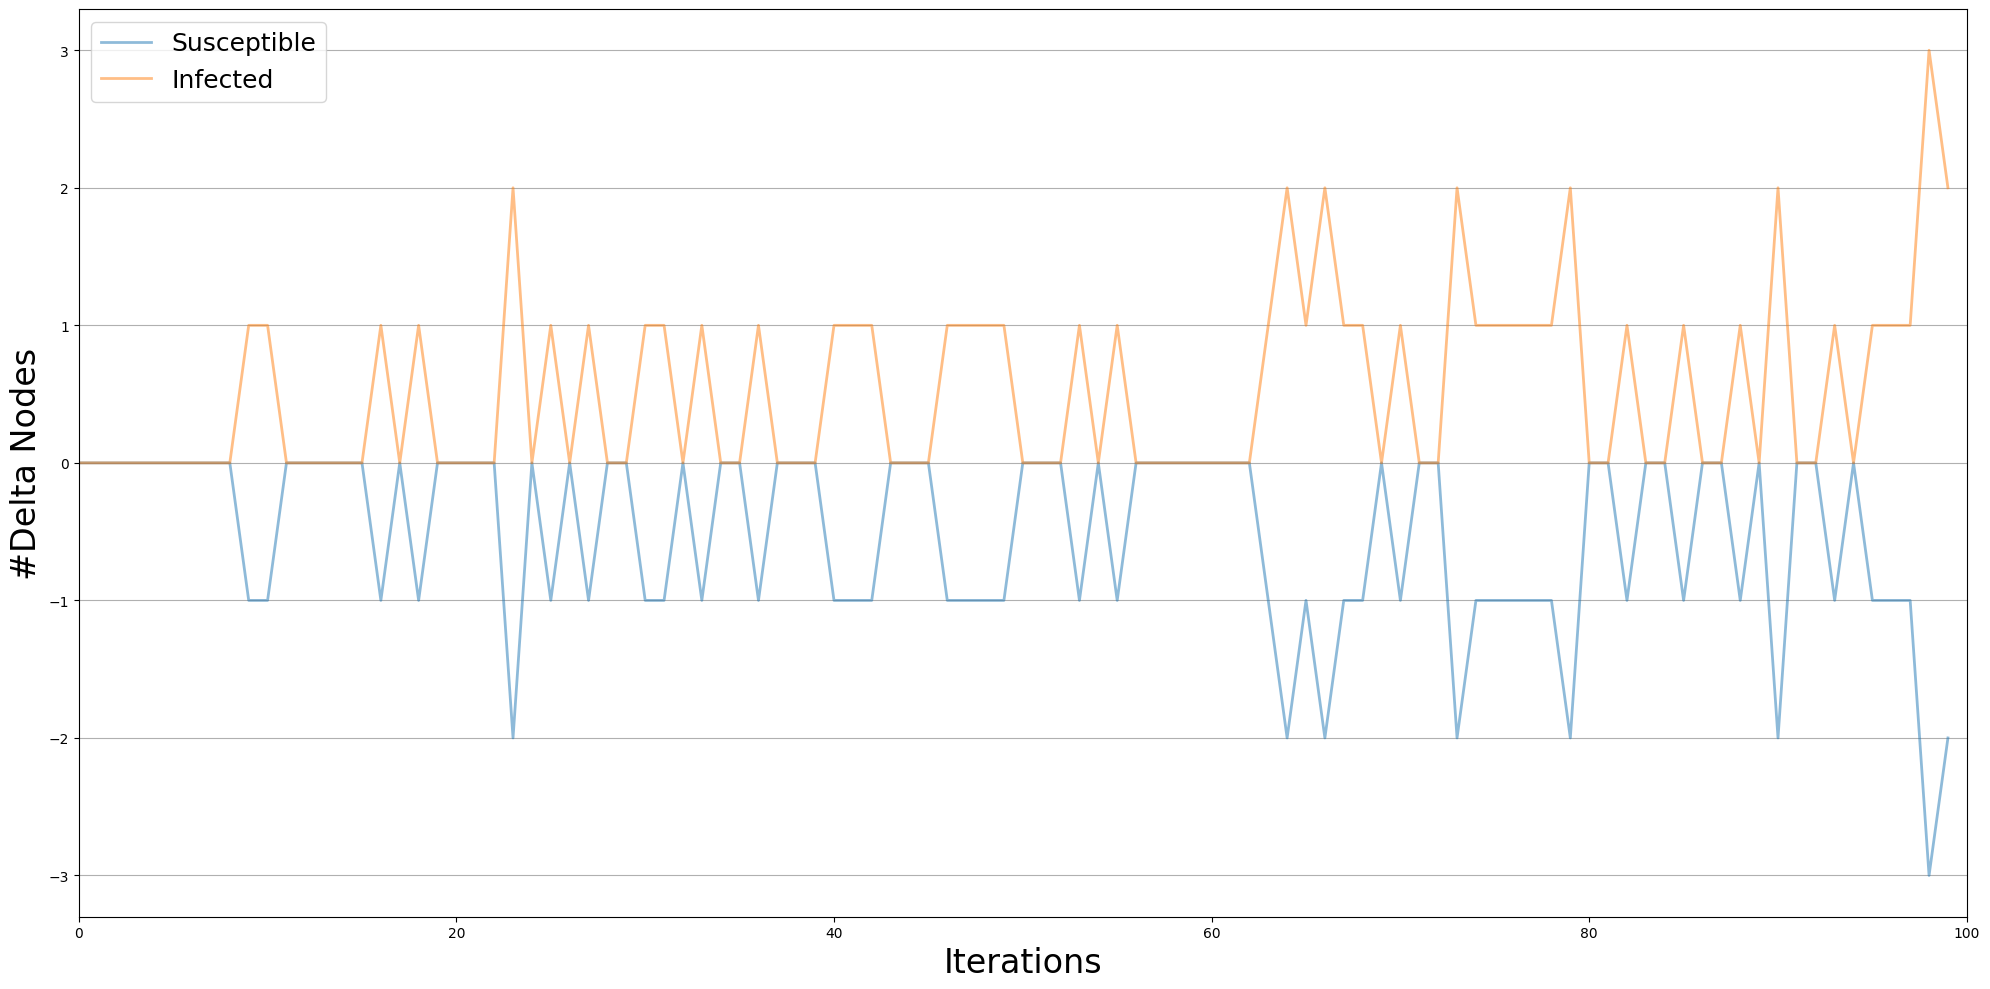

In [60]:
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence
viz = DiffusionPrevalence(model, trends)
viz.plot()

## SIS

In [61]:
model = ep.SISModel(G)

In [62]:
model.available_statuses

{'Susceptible': 0, 'Infected': 1}

In [63]:
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.001) # infection rate
cfg.add_model_parameter('lambda', 0.005) # recovery rate
cfg.add_model_parameter("percentage_infected", 0.01)
model.set_initial_status(cfg)

In [64]:
iterations = model.iteration_bunch(100, node_status=True)
trends = model.build_trends(iterations)

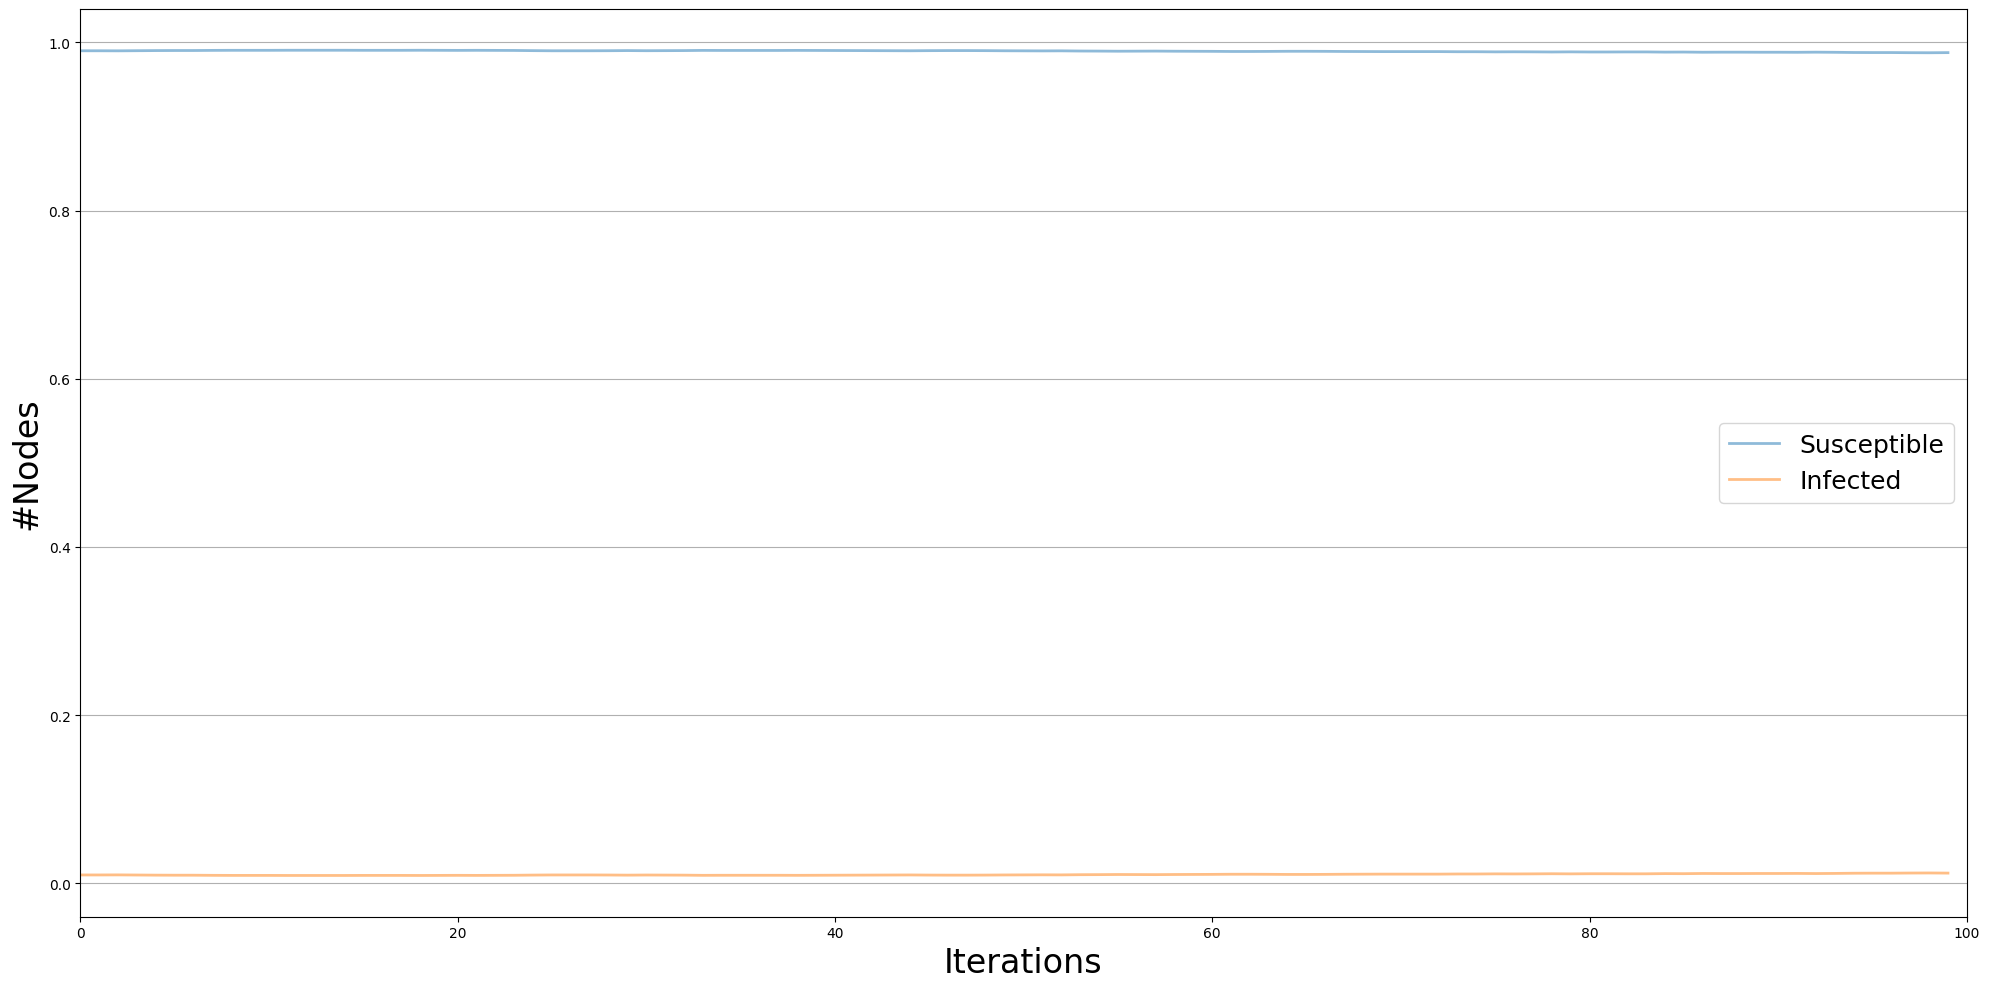

In [65]:
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot()

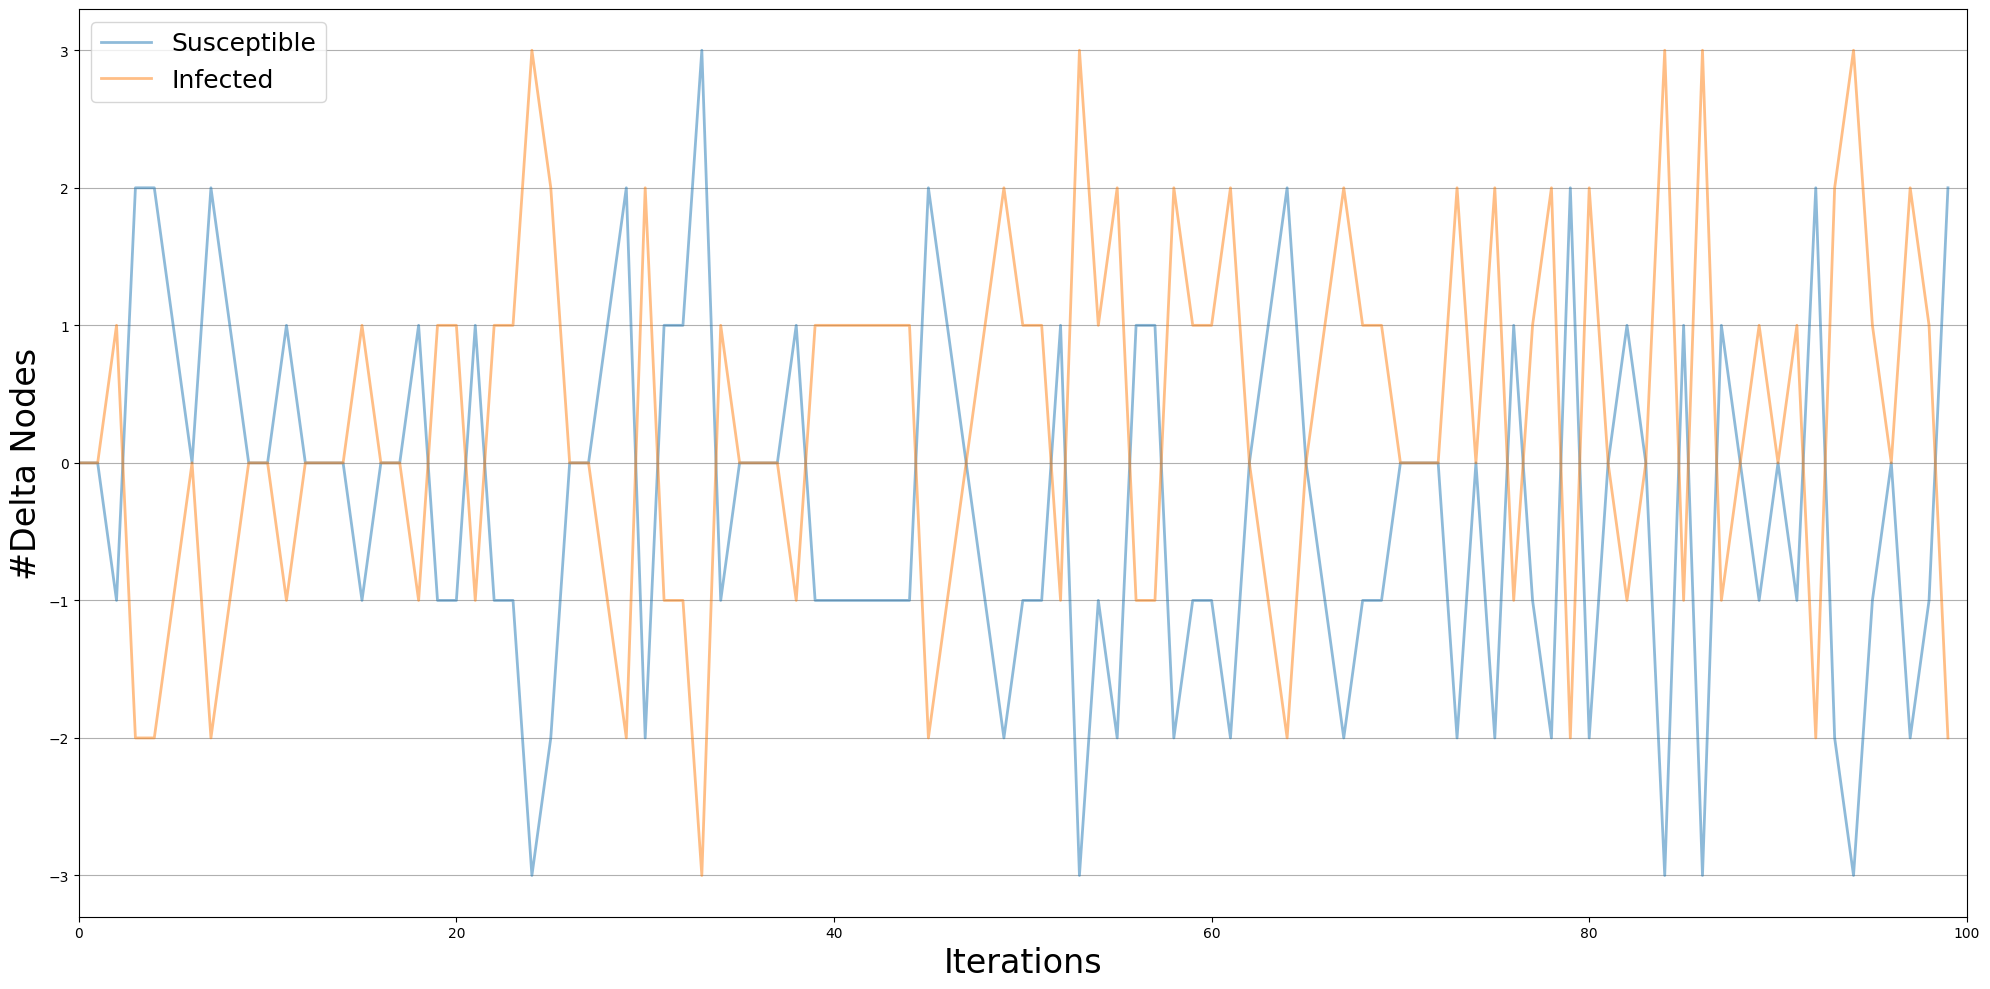

In [66]:
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence
viz = DiffusionPrevalence(model, trends)
viz.plot()

## SIR

In [67]:
model = ep.SIRModel(G)

In [68]:
model.available_statuses

{'Susceptible': 0, 'Infected': 1, 'Removed': 2}

In [69]:
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.001) # infection rate
cfg.add_model_parameter('gamma', 0.01) # recovery rate
cfg.add_model_parameter("percentage_infected", 0.01)
model.set_initial_status(cfg)

In [70]:
iterations = model.iteration_bunch(200, node_status=True)
trends = model.build_trends(iterations)

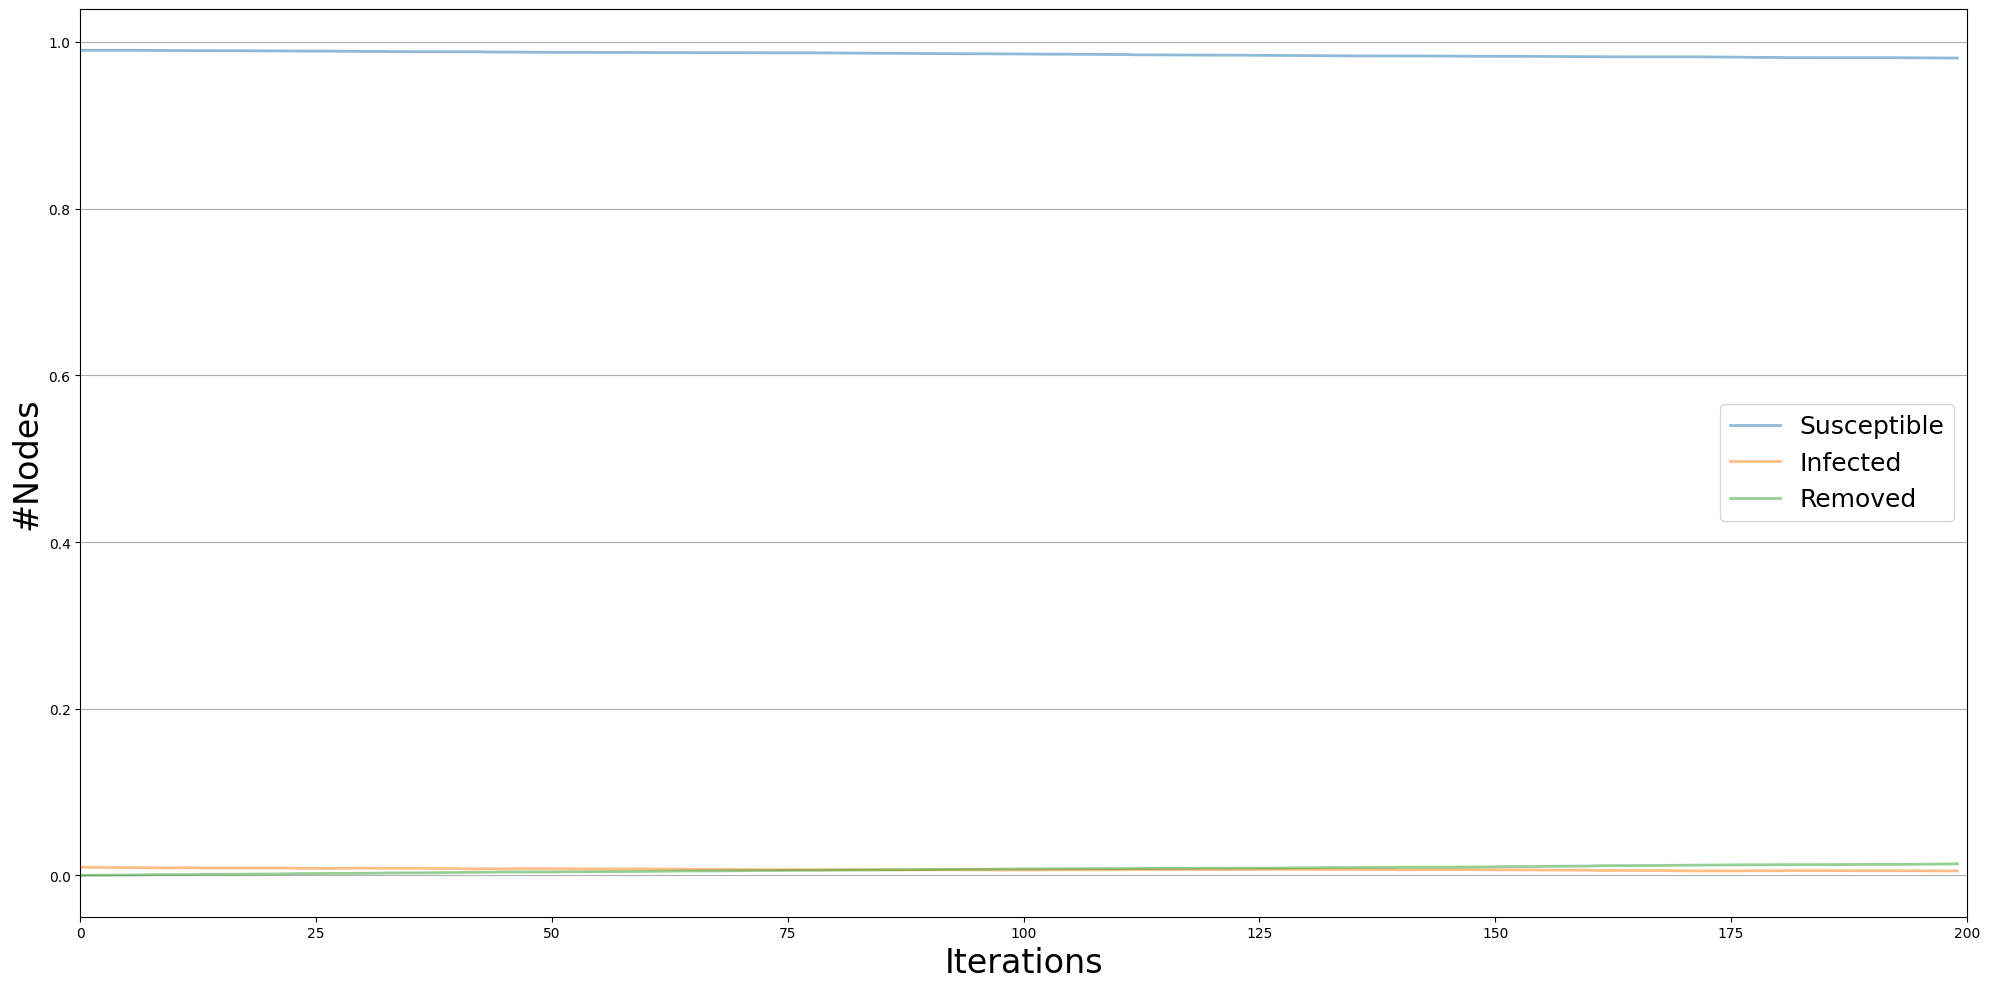

In [71]:
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot()

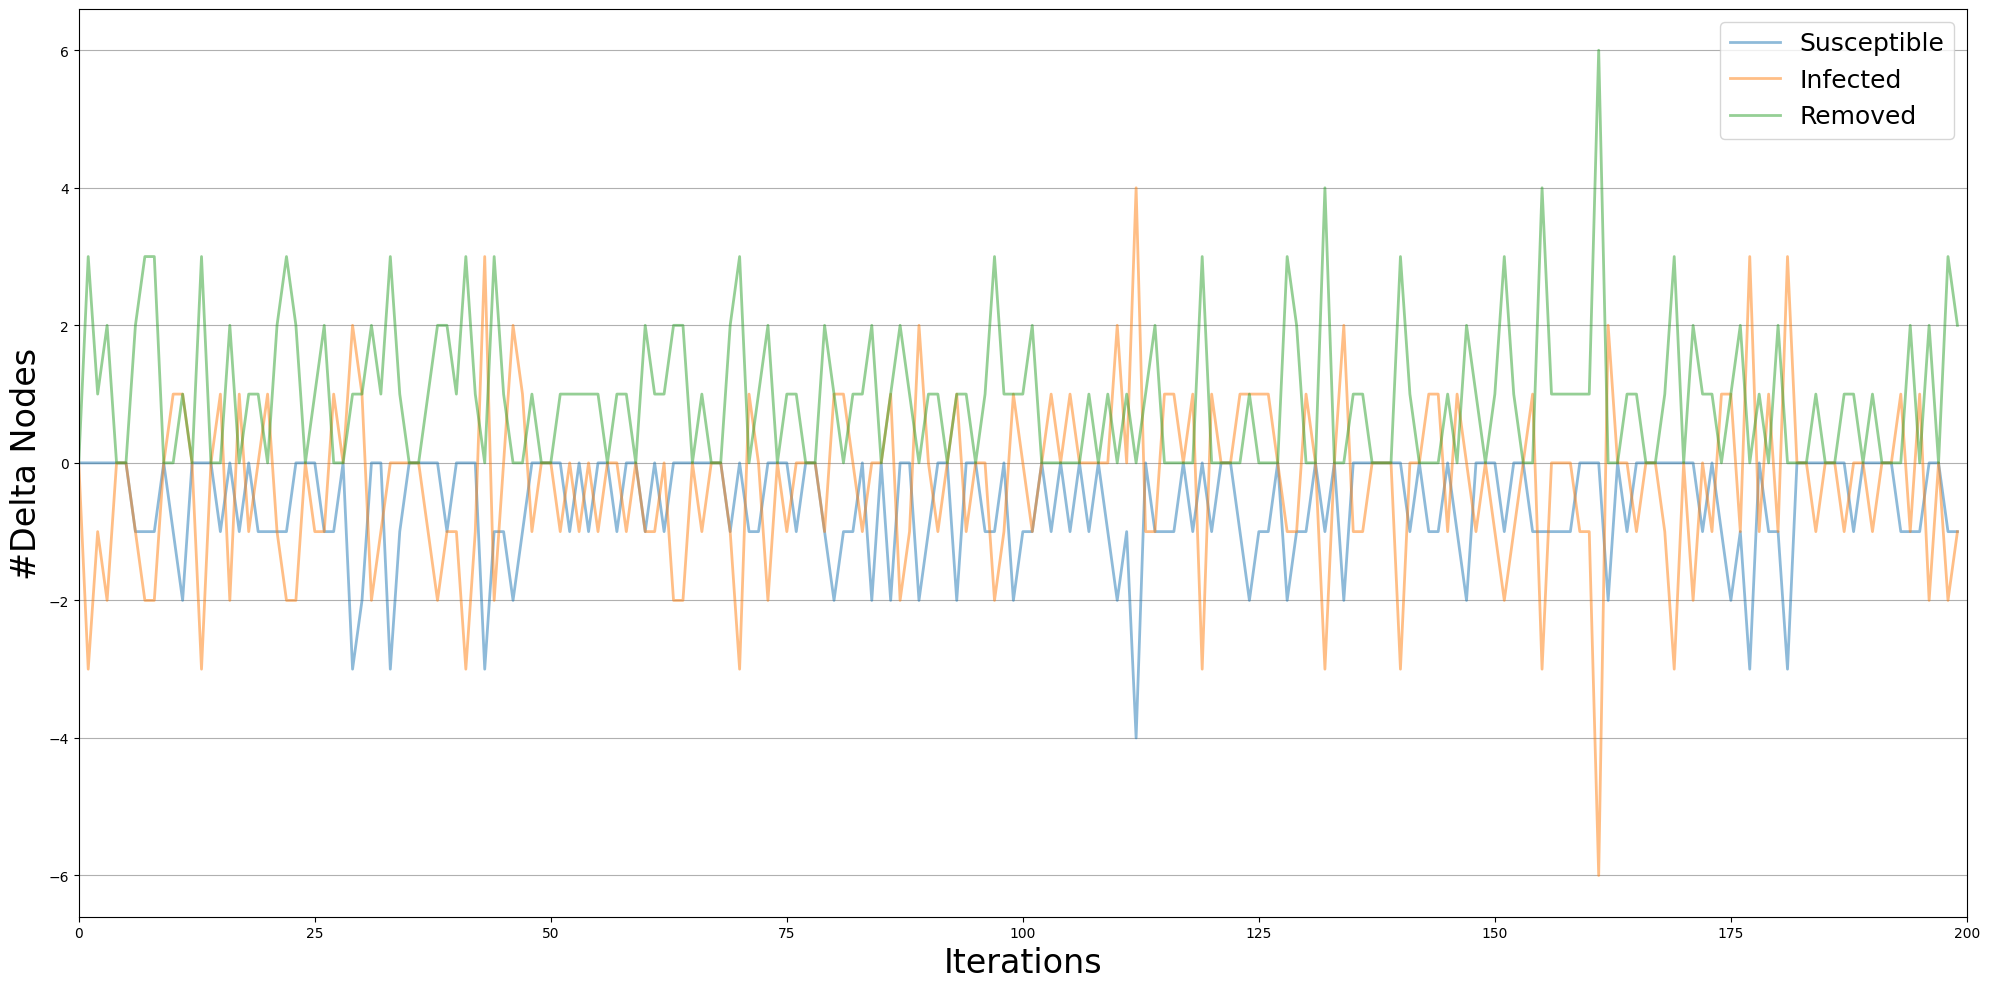

In [72]:
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence
viz = DiffusionPrevalence(model, trends)
viz.plot()